In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import straticor as scr

plt.style.use(
    "https://raw.githubusercontent.com/srnarvaez/my-mpl-themes/main/basic.mplstyle"
)

%matplotlib widget


In [2]:
col_1 = scr.load_column("../data/afloramiento/quebrada_la_amarilla_1/lam1.xlsx", delta=0.1)
col_1 = col_1.query("bottom > 179 & bottom < 192")
col_1["bottom"] = col_1["bottom"] - col_1["bottom"].min()

col_2 = scr.load_column("../data/afloramiento/quebrada_la_amarilla_2/lam2.xlsx", delta=0.1)
col_2 = col_2.query("bottom < 7.6")

fake_coords = {"lam1": (-72.82423434, 4.51037816), "lam2": (-72.82395998, 4.51014488)}


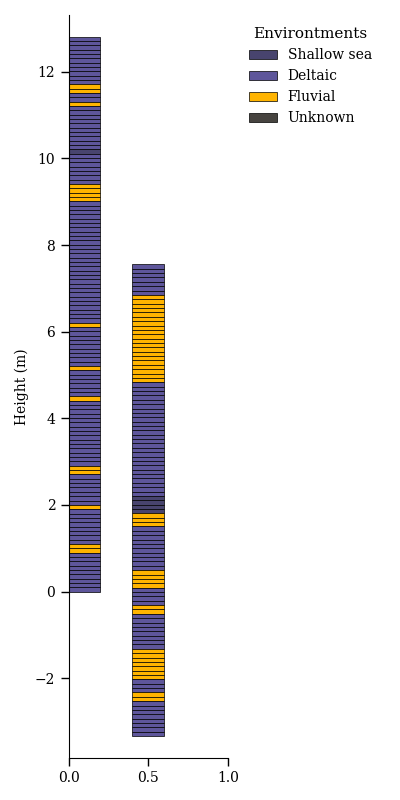

In [3]:
fig, ax = plt.subplots(figsize=(4, 8))

ax = scr.plot_column(col_1, ax=ax, lw=0.5)
ax = scr.plot_column(col_2, ax=ax, x_pos=0.4, lw=0.5)

ax.set(
    ylabel="Height (m)",
    ylim=(col_2["bottom"].min() - 0.5, col_1["bottom"].max() + 0.5)
)

plt.show()


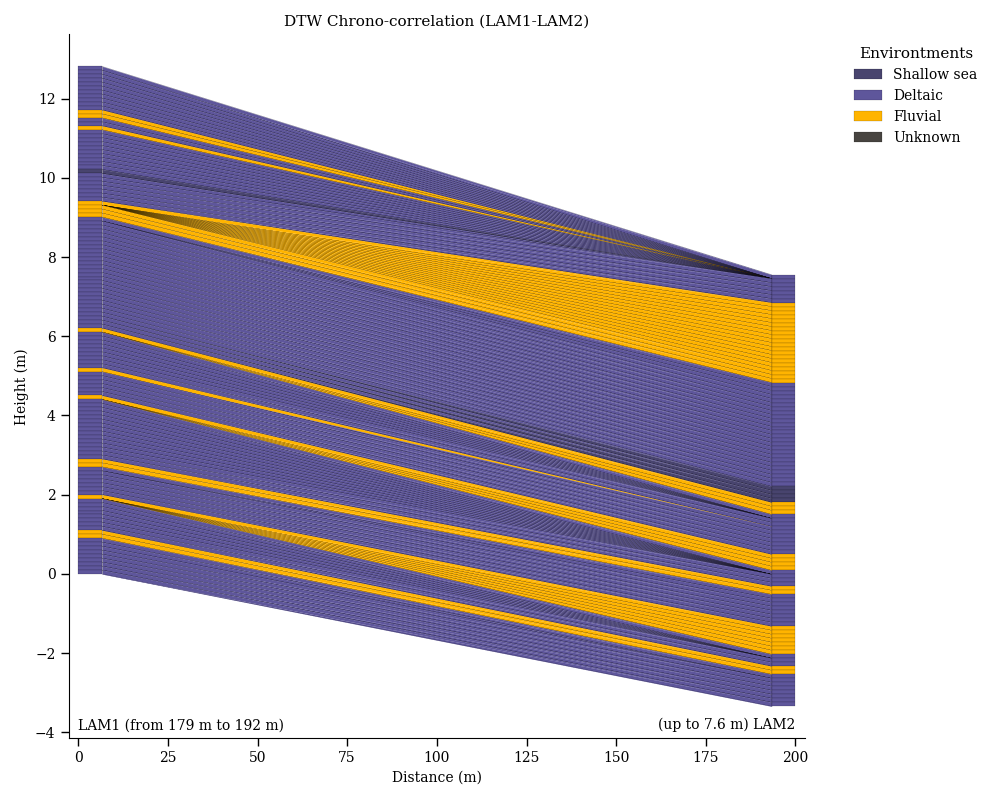

In [4]:
d, corr_matrix = scr.dtw_log(col_1, col_2, cost_func="chrono", alpha=0.06, penalty=0.0)
col_3, corr_path = scr.warp_log(col_1, col_2, corr_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

ax = scr.plot_section(col_1, col_2, corr_path, space=200, ax=ax, lw=0.1)
ax.text(0.0, -4.0, "LAM1 (from 179 m to 192 m)", va="bottom", ha="left")
ax.text(200.0, -4.0, "(up to 7.6 m) LAM2", va="bottom", ha="right")

ax.set(
    xlabel="Distance (m)",
    ylabel="Height (m)",
    title="DTW Chrono-correlation (LAM1-LAM2)",
)

plt.show()


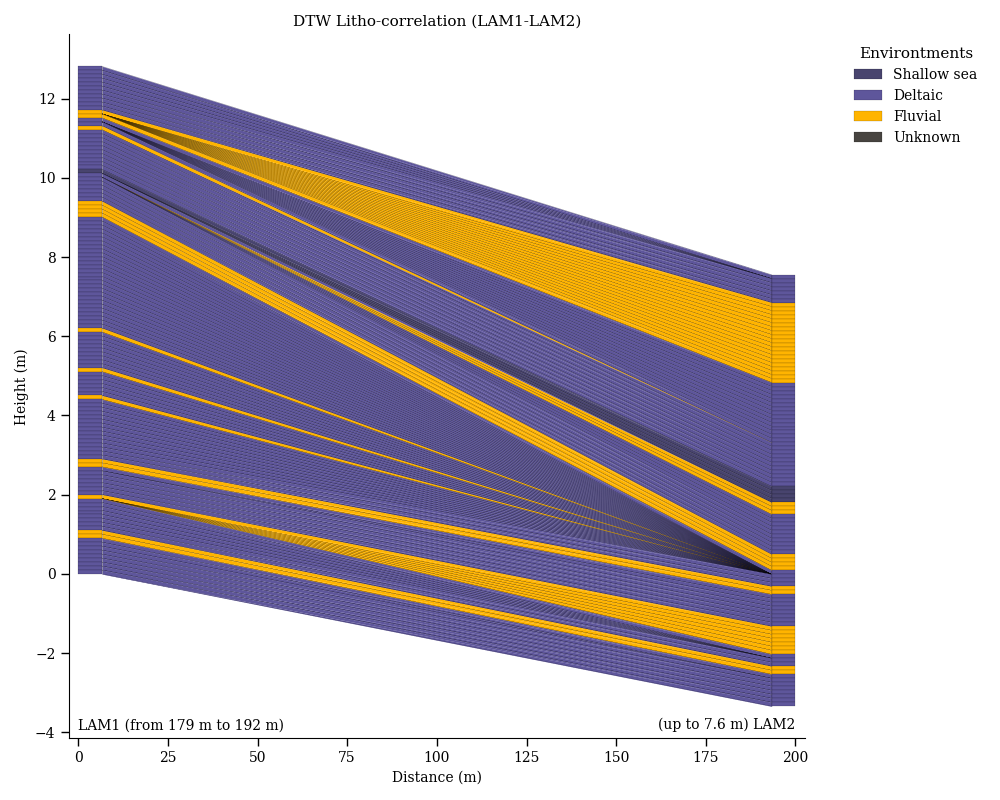

In [5]:
d, corr_matrix = scr.dtw_log(col_1, col_2, cost_func="litho", penalty=0.0)
col_3, corr_path = scr.warp_log(col_1, col_2, corr_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

ax = scr.plot_section(col_1, col_2, corr_path, space=200, ax=ax, lw=0.1)
ax.text(0.0, -4.0, "LAM1 (from 179 m to 192 m)", va="bottom", ha="left")
ax.text(200.0, -4.0, "(up to 7.6 m) LAM2", va="bottom", ha="right")

ax.set(
    xlabel="Distance (m)",
    ylabel="Height (m)",
    title="DTW Litho-correlation (LAM1-LAM2)",
)

plt.show()
